In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import astropy.io.fits as pyfits
import astropy.utils as autils
import requests
import json
import datetime
from pprint import pprint as pp
import os
import astropy.io.fits as fits

# Jielai added modules f
import subprocess
import seaborn as sns
pw = 'DWFL2016a'
usrname = 'jcooke@astro.swin.edu.au'

# Time Counter function
import time
def tic():
    tic.start = time.perf_counter()
def toc():
    elapsed_seconds = time.perf_counter() - tic.start
    return elapsed_seconds # fractional

# NOAO server Settings
natroot = 'https://astroarchive.noirlab.edu'
assert natroot == 'https://astroarchive.noirlab.edu', 'Notebook does NOT point to PRODUCTION'
print(f"Using server on {natroot}")
adsurl = f'{natroot}/api/adv_search'
print(f"adsurl = {adsurl}")

# Start the timer
print(f'Started on: {str(datetime.datetime.now())}')
tic() # Start timing the run of this notebook

Using server on https://astroarchive.noirlab.edu
adsurl = https://astroarchive.noirlab.edu/api/adv_search
Started on: 2022-02-03 10:06:35.860406


In [25]:
jj = {
    "outfields" : [
        "md5sum",
        "archive_filename",
        "original_filename",
        #"telescope",
        #"instrument",
        #"obs_type",
        "proc_type",
        "prod_type",
        #"release_date",
        "proposal",
        "ra_center",
        #"ra_min",
        "dec_center",
        #"dec_min",
        # 'The local calendar date of the telescope, at the start of PM observing.' = caldat
        "caldat",
        "url",
        "filesize",
        "ifilter",
        #"seeing",
        "exposure",
        #"depth",
        "dateobs_min",
        "dateobs_max",
        'release_date'
    ],
    "search" : [
        #["release_date", "2020-01-01", "2021-01-01"], # proprietary
        ["obs_type", 'object'],
        #["pi", 'cooke'],
        ["proposal","2020B-0253"],
        ["proc_type","instcal"],
        ["prod_type", "image"],
        ["caldat","2021-06-05", "2021-06-06"]
    ]
}
apiurl = f'{adsurl}/fasearch/?limit=200000'
print(f'Using API url: {apiurl}')
ads_df = pd.DataFrame(requests.post(apiurl,json=jj).json()[1:])
print(len(ads_df))
#ads_df

Using API url: https://astroarchive.noirlab.edu/api/adv_search/fasearch/?limit=200000
564


Text(0.5, 1.0, 'all fields observed during DWF run 2021 June')

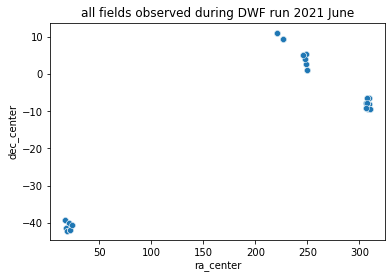

In [26]:
sns.scatterplot(data=ads_df, x="ra_center", y="dec_center")
plt.title("all fields observed during DWF run 2021 June")

0.01 0.009923426056493543 -0.9923426056493543
36


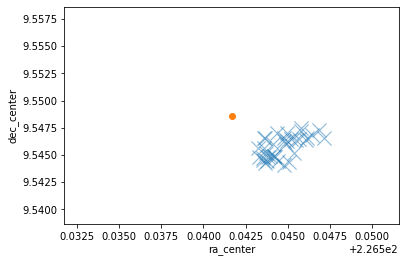

In [27]:
# 226.54167   +9.54861
field_name = 'S82sub8'
field_RA   =  226.54167
field_DEC  = 9.54861
dec_offset_allowance = 0.01
RA_offset_allowance  = np.abs(dec_offset_allowance*np.cos(field_DEC))
print(dec_offset_allowance,RA_offset_allowance,np.cos(field_DEC))
ra_min = field_RA-RA_offset_allowance
ra_max = field_RA+RA_offset_allowance
dec_min = field_DEC-dec_offset_allowance
dec_max = field_DEC+dec_offset_allowance
field_ads_df = ads_df[( (ads_df['ra_center']>ra_min) & (ads_df['ra_center']<ra_max) &
                        (ads_df['dec_center']<dec_max) & (ads_df['dec_center']>dec_min)
                     )]
print(len(field_ads_df))

sns.scatterplot(data=ads_df, x="ra_center", y="dec_center", alpha=0.5, marker='x',s=200)
plt.ylim(dec_min, dec_max)
plt.xlim(ra_min, ra_max)
plt.scatter(field_RA,field_DEC)
#field_ads_df

In [28]:
field_ads_df.keys()

Index(['md5sum', 'archive_filename', 'original_filename', 'proc_type',
       'prod_type', 'proposal', 'ra_center', 'dec_center', 'caldat',
       'filesize', 'ifilter', 'exposure', 'release_date', 'dateobs_min',
       'dateobs_max', 'url'],
      dtype='object')

In [29]:
field_ads_df[['caldat','proc_type','prod_type','ifilter','exposure','original_filename']]

,caldat,proc_type,prod_type,ifilter,exposure,original_filename
14,2021-06-06,instcal,image,g DECam SDSS c0001 4720.0 1520.0,20.0,/data_local/images/DTS/2020B-0253/DECam_010073...
15,2021-06-05,instcal,image,g DECam SDSS c0001 4720.0 1520.0,20.0,/data_local/images/DTS/2020B-0253/DECam_010068...
20,2021-06-06,instcal,image,g DECam SDSS c0001 4720.0 1520.0,20.0,/data_local/images/DTS/2020B-0253/DECam_010073...
48,2021-06-06,instcal,image,g DECam SDSS c0001 4720.0 1520.0,20.0,/data_local/images/DTS/2020B-0253/DECam_010073...
56,2021-06-05,instcal,image,g DECam SDSS c0001 4720.0 1520.0,20.0,/data_local/images/DTS/2020B-0253/DECam_010068...
63,2021-06-05,instcal,image,g DECam SDSS c0001 4720.0 1520.0,20.0,/data_local/images/DTS/2020B-0253/DECam_010068...
64,2021-06-06,instcal,image,g DECam SDSS c0001 4720.0 1520.0,20.0,/data_local/images/DTS/2020B-0253/DECam_010073...
80,2021-06-05,instcal,image,g DECam SDSS c0001 4720.0 1520.0,20.0,/data_local/images/DTS/2020B-0253/DECam_010068...
93,2021-06-05,instcal,image,g DECam SDSS c0001 4720.0 1520.0,20.0,/data_local/images/DTS/2020B-0253/DECam_010068...
98,2021-06-05,instcal,image,g DECam SDSS c0001 4720.0 1520.0,20.0,/data_local/images/DTS/2020B-0253/DECam_010068...


In [33]:
# first night, g,i
df_1  = field_ads_df[ field_ads_df['caldat']== '2021-06-05']
df_g1 = df_1[         df_1['ifilter']=='g DECam SDSS c0001 4720.0 1520.0']
df_i1 = df_1[         df_1['ifilter']=='i DECam SDSS c0003 7835.0 1470.0']

In [48]:
print( [     x.split('_')[-1].replace('.fits.fz','')     for x in df_g1['original_filename'] ])
df_g1[['dateobs_min','caldat','proc_type','prod_type','ifilter','exposure']]

['01006859', '01006860', '01006853', '01006864', '01006862', '01006858', '01006866', '01006863', '01006861', '01006851', '01006865', '01006867', '01006852', '01006857', '01006868']


,dateobs_min,caldat,proc_type,prod_type,ifilter,exposure
15,2021-06-06T05:20:31.859813Z,2021-06-05,instcal,image,g DECam SDSS c0001 4720.0 1520.0,20.0
56,2021-06-06T05:21:20.526342Z,2021-06-05,instcal,image,g DECam SDSS c0001 4720.0 1520.0,20.0
63,2021-06-06T05:09:08.562269Z,2021-06-05,instcal,image,g DECam SDSS c0001 4720.0 1520.0,20.0
80,2021-06-06T05:24:38.895905Z,2021-06-05,instcal,image,g DECam SDSS c0001 4720.0 1520.0,20.0
93,2021-06-06T05:22:59.050227Z,2021-06-05,instcal,image,g DECam SDSS c0001 4720.0 1520.0,20.0
98,2021-06-06T05:19:42.039866Z,2021-06-05,instcal,image,g DECam SDSS c0001 4720.0 1520.0,20.0
131,2021-06-06T05:26:19.221495Z,2021-06-05,instcal,image,g DECam SDSS c0001 4720.0 1520.0,20.0
248,2021-06-06T05:23:49.201166Z,2021-06-05,instcal,image,g DECam SDSS c0001 4720.0 1520.0,20.0
313,2021-06-06T05:22:10.486810Z,2021-06-05,instcal,image,g DECam SDSS c0001 4720.0 1520.0,20.0
342,2021-06-06T05:07:30.669300Z,2021-06-05,instcal,image,g DECam SDSS c0001 4720.0 1520.0,20.0


In [43]:
print( [     x.split('_')[-1].replace('.fits.fz','')     for x in df_i1['original_filename'] ])
df_i1[['caldat','proc_type','prod_type','ifilter','exposure']]

['01006856', '01006855', '01006854']


,caldat,proc_type,prod_type,ifilter,exposure
239,2021-06-05,instcal,image,i DECam SDSS c0003 7835.0 1470.0,150.0
363,2021-06-05,instcal,image,i DECam SDSS c0003 7835.0 1470.0,150.0
448,2021-06-05,instcal,image,i DECam SDSS c0003 7835.0 1470.0,150.0


In [34]:
# second night, g, i
df_2  = field_ads_df[ field_ads_df['caldat']== '2021-06-06']
df_g2 = df_2[         df_2['ifilter']=='g DECam SDSS c0001 4720.0 1520.0']
df_i2 = df_2[         df_2['ifilter']=='i DECam SDSS c0003 7835.0 1470.0']

In [47]:
print( [     x.split('_')[-1].replace('.fits.fz','')     for x in df_g2['original_filename'] ])
df_g2[['caldat','proc_type','prod_type','ifilter','exposure']]

['01007332', '01007338', '01007336', '01007337', '01007335', '01007327', '01007323', '01007322', '01007329', '01007331', '01007330', '01007328', '01007334', '01007321', '01007333']


,caldat,proc_type,prod_type,ifilter,exposure
14,2021-06-06,instcal,image,g DECam SDSS c0001 4720.0 1520.0,20.0
20,2021-06-06,instcal,image,g DECam SDSS c0001 4720.0 1520.0,20.0
48,2021-06-06,instcal,image,g DECam SDSS c0001 4720.0 1520.0,20.0
64,2021-06-06,instcal,image,g DECam SDSS c0001 4720.0 1520.0,20.0
118,2021-06-06,instcal,image,g DECam SDSS c0001 4720.0 1520.0,20.0
144,2021-06-06,instcal,image,g DECam SDSS c0001 4720.0 1520.0,20.0
205,2021-06-06,instcal,image,g DECam SDSS c0001 4720.0 1520.0,20.0
228,2021-06-06,instcal,image,g DECam SDSS c0001 4720.0 1520.0,20.0
284,2021-06-06,instcal,image,g DECam SDSS c0001 4720.0 1520.0,20.0
302,2021-06-06,instcal,image,g DECam SDSS c0001 4720.0 1520.0,20.0


In [46]:
print( [     x.split('_')[-1].replace('.fits.fz','')     for x in df_i2['original_filename'] ])
df_i2[['caldat','proc_type','prod_type','ifilter','exposure']]

['01007324', '01007326', '01007325']


,caldat,proc_type,prod_type,ifilter,exposure
423,2021-06-06,instcal,image,i DECam SDSS c0003 7835.0 1470.0,150.0
471,2021-06-06,instcal,image,i DECam SDSS c0003 7835.0 1470.0,150.0
505,2021-06-06,instcal,image,i DECam SDSS c0003 7835.0 1470.0,150.0
